<a href="https://colab.research.google.com/github/DeveloperSahil2001/Machine_Learning/blob/main/multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving companies.csv to companies (1).csv


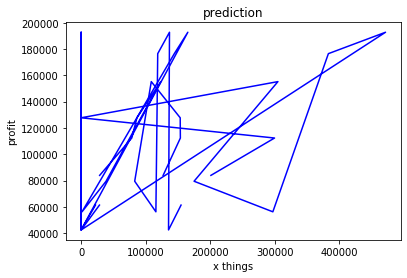

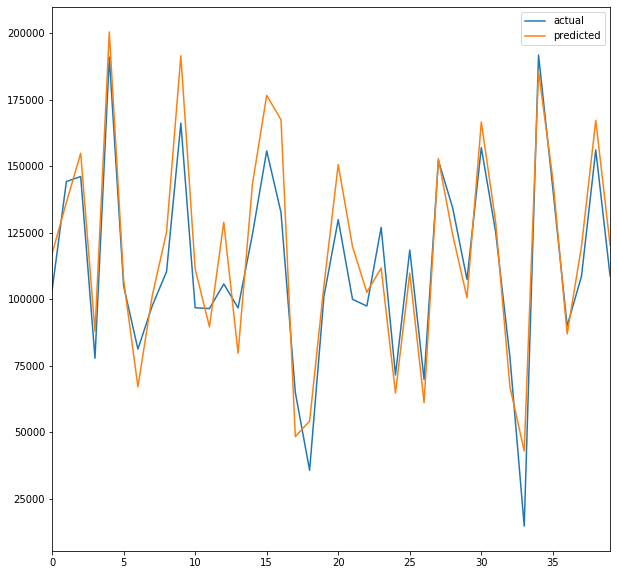

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
                                                                           #importing the dataset
dataset=pd.read_csv("companies.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])

transformer=ColumnTransformer(
    transformers=[
        ("State",  #just a name
         OneHotEncoder(),#The transformer class
         [3]      #the column(s) to be applied
         )
    ],remainder='passthrough'
)
X= transformer.fit_transform(X)
                                                                           #avoiding the dummy variable trap
X=X[:,1:]
                                                                           #splitting the ddataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=8/10,random_state=0)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

Y_pred=regressor.predict(X_test)
                                                                          #plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('prediction')
plt.xlabel('x things')
plt.ylabel('profit')
plt.show()
df=pd.DataFrame({'actual':Y_test,"predicted":Y_pred})
df.plot(kind='line',figsize=(10,10))
df
plt.show()